This is another way of finding the parameters from the noise using bayesian inference

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares


In [2]:
def StraightLine(params):
    m = params[0]
    c = params[1]

    return m*time_axis + c

def loglike(params):
    """The log-likelihood function."""
    t = StraightLine(params)

    chisq = np.sum((d - t)**2)

    return -0.5 * chisq

# Define our uniform prior.
def ptform(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""
    m = 2 * (2*u[0] - 1)
    c = 5 * (2*u[1] - 1)
    return [m, c]

In [3]:
# Define the dimensionality of our problem.
ndim = 2

#time_axis = np.linspace(-1, 1, 1000)
#s = (np.exp(-(2)*time_axis) * np.cos(24 * time_axis))
n = np.random.randn(1000)

m = 1
c = 2

time_axis = np.linspace(-1, 1, 1000)
s = StraightLine([m, c]) 

d = s + n

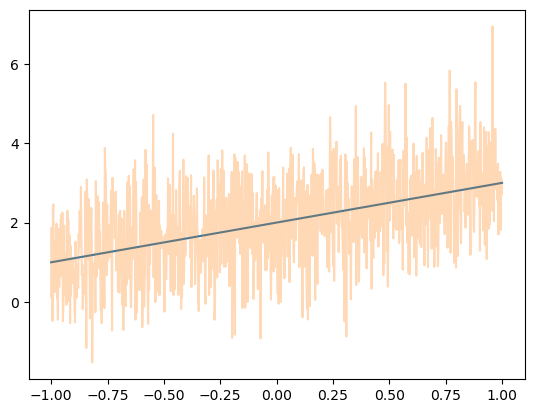

In [4]:
plt.plot(time_axis, s)
plt.plot(time_axis, d, alpha = 0.3)

In [5]:
import dynesty

# "Static" nested sampling.
sampler = dynesty.NestedSampler(loglike, ptform, ndim)
sampler.run_nested()
sresults = sampler.results

4482it [00:06, 738.81it/s, +500 | bound: 7 | nc: 1 | ncall: 23298 | eff(%): 21.853 | loglstar:   -inf < -540.202 <    inf | logz: -548.311 +/-  0.119 | dlogz:  0.001 >  0.509]


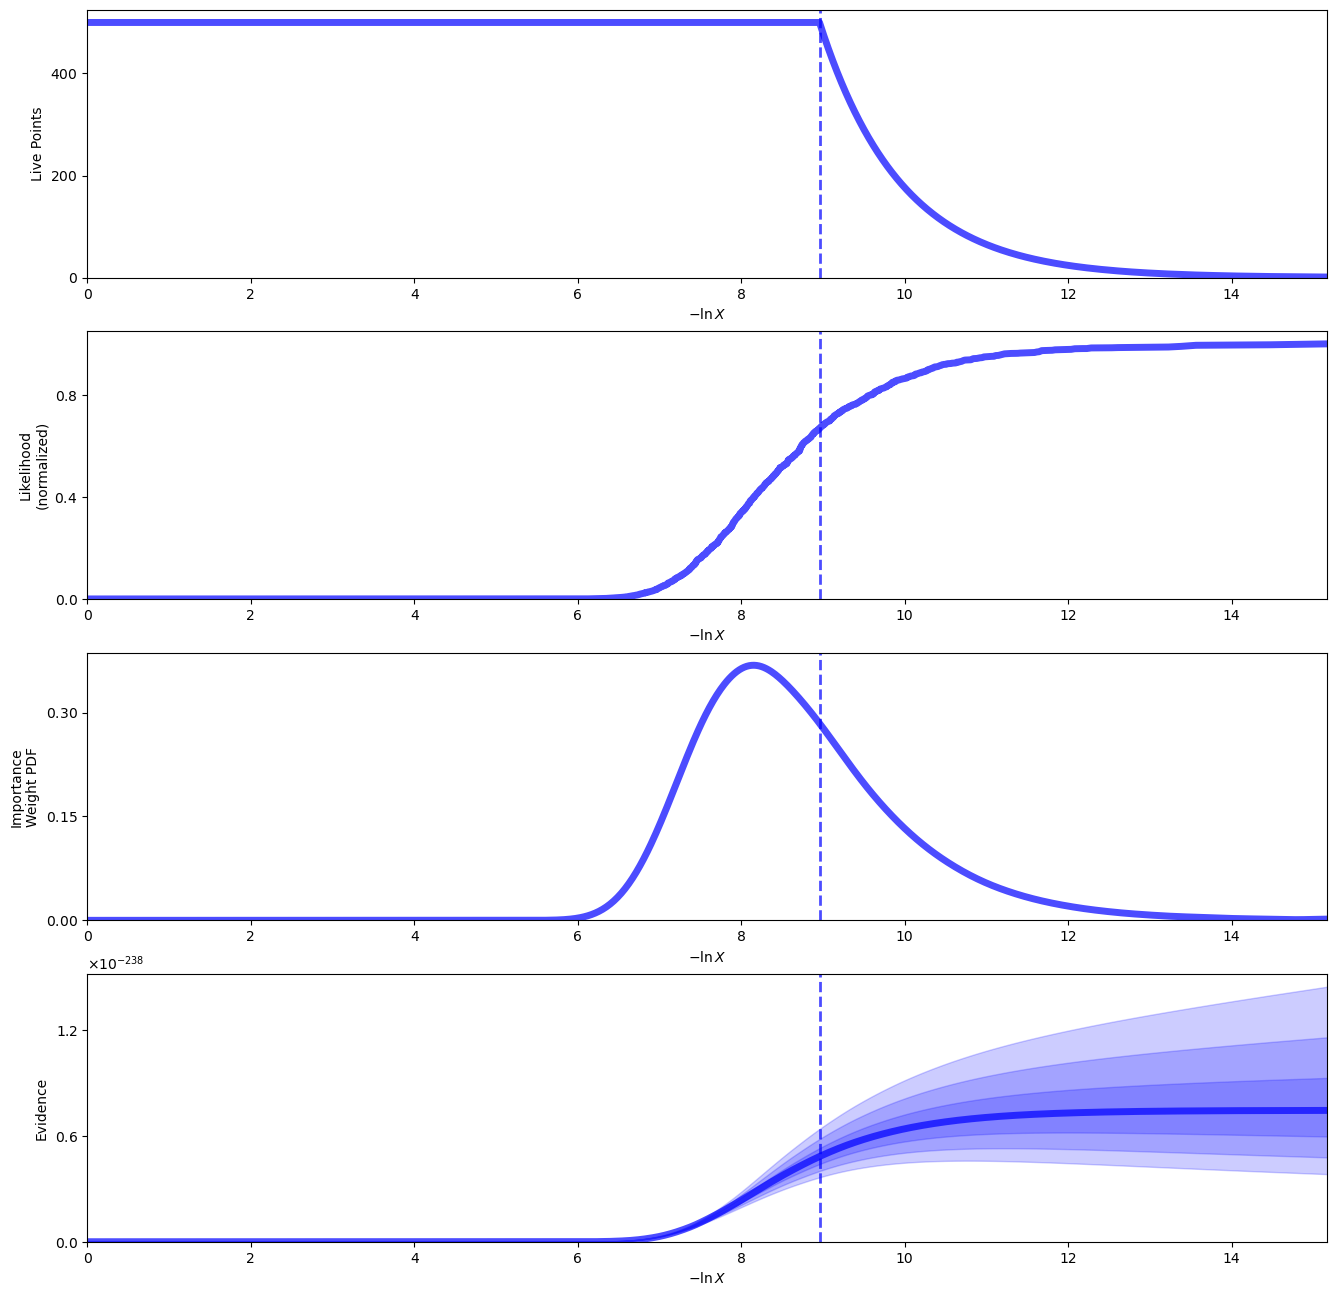

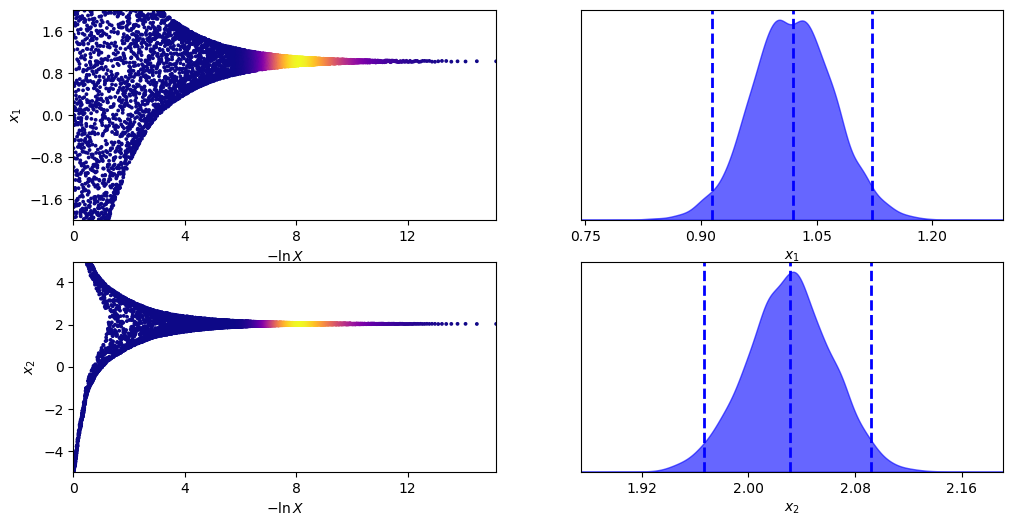

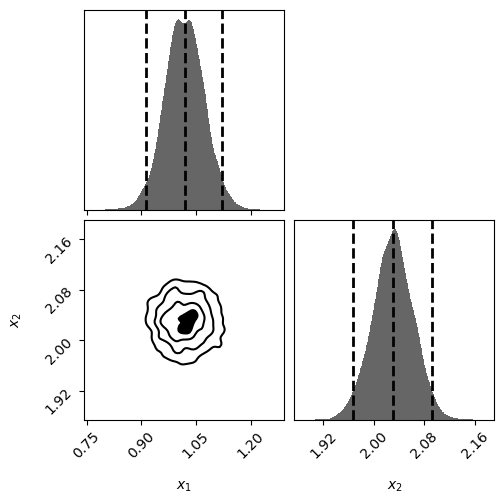

In [6]:
from dynesty import plotting as dyplot

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(sresults)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(sresults)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(sresults)

In [7]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = sresults.samples  # samples
weights = sresults.importance_weights()

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights)
             for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = sresults.samples_equal()

# Generate a new set of results with sampling uncertainties.
results_sim = dyfunc.resample_run(sresults)

print(mean)
print(cov)

[1.01851813 2.03050715]
[[2.77723807e-03 1.89348850e-05]
 [1.89348850e-05 9.94120518e-04]]


In [8]:
sigma_m = np.sqrt(cov[0, 0])
print(sigma_m)

sigma_c = np.sqrt(cov[1, 1])
print(sigma_c)

0.052699507331020766
0.03152967677534813
